In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path1 = "/content/drive/MyDrive/datasets/Diabeticdata.zip" # for Omar Essa's Diabetic Retinopathy Kaggle Dataset | Link: https://www.kaggle.com/datasets/jockeroika/diabetic-retinopathy/data
file_path2 = "/content/drive/MyDrive/datasets/Diabeticdata2.zip" # for Sovit Ranjan Rath's Diabetic Retinopathy Kaggle Dataset | Link: https://www.kaggle.com/datasets/sovitrath/diabetic-retinopathy-224x224-2019-data

Mounted at /content/drive


In [ ]:
import zipfile
import os

extract1 = "/content/diabeticData"
extract2 = "/content/diabeticData2"

os.makedirs(extract1, exist_ok=True)
os.makedirs(extract2, exist_ok=True)

with zipfile.ZipFile(file_path1, 'r') as zip_ref: # extract first datasets zip
    zip_ref.extractall(extract1)

with zipfile.ZipFile(file_path2, 'r') as zip_ref: # extract second datasets zip
    zip_ref.extractall(extract2)

In [ ]:
import os

classCount1 = []
classCount2 = []

classes1 = ["Healthy", "Mild DR", "Moderate DR", "Proliferate DR", "Severe DR"]
classes2 = ["Mild", "Moderate", "No_DR", "Proliferate_DR", "Severe"]

path1 = "/content/diabeticData"
path2 = "/content/diabeticData2/colored_images"

print("Distrubtion for Essa's dataset") # print how many images of each class are in Essa's dataset
for cls in classes1:
    folder = os.path.join(path1, cls)
    count = len([f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))])
    classCount1.append(count)
    print(f"{cls}: {count} images")

print("\n")

print("Distrubtion for Rath's dataset") # print how many images of each class are in Rath's dataset
for cls in classes2:
    folder = os.path.join(path2, cls)
    count = len([f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))])
    classCount2.append(count)
    print(f"{cls}: {count} images")

Distrubtion for Essa's dataset
Healthy: 525 images
Mild DR: 370 images
Moderate DR: 599 images
Proliferate DR: 290 images
Severe DR: 202 images


Distrubtion for Rath's dataset
Mild: 370 images
Moderate: 999 images
No_DR: 1805 images
Proliferate_DR: 295 images
Severe: 193 images


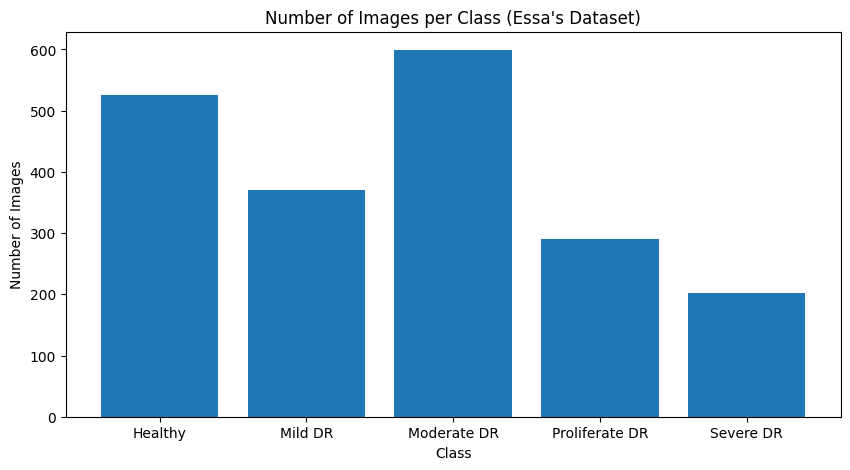

Text(0.5, 1.0, "Number of Images per Class (Rath's dataset)")

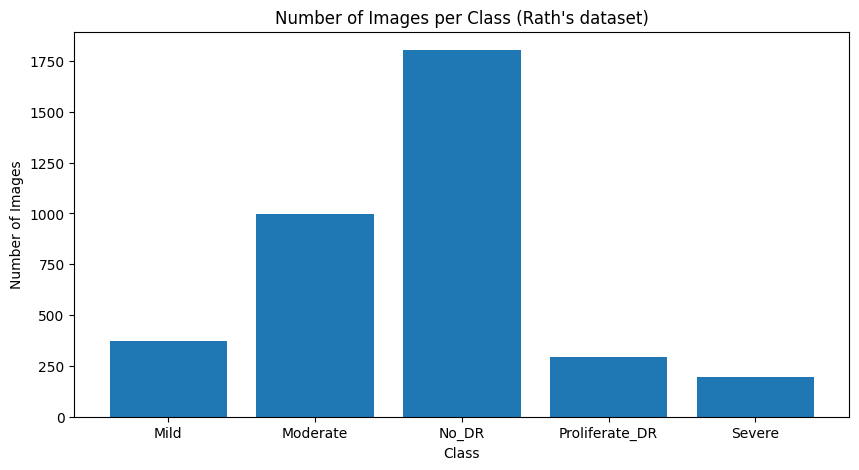

In [ ]:
# graph distribution of relative datasets
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(classes1, classCount1) # Essa's dataset
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Number of Images per Class (Essa's Dataset)")
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(classes2, classCount2) # Rath's dataset
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Number of Images per Class (Rath's dataset)")

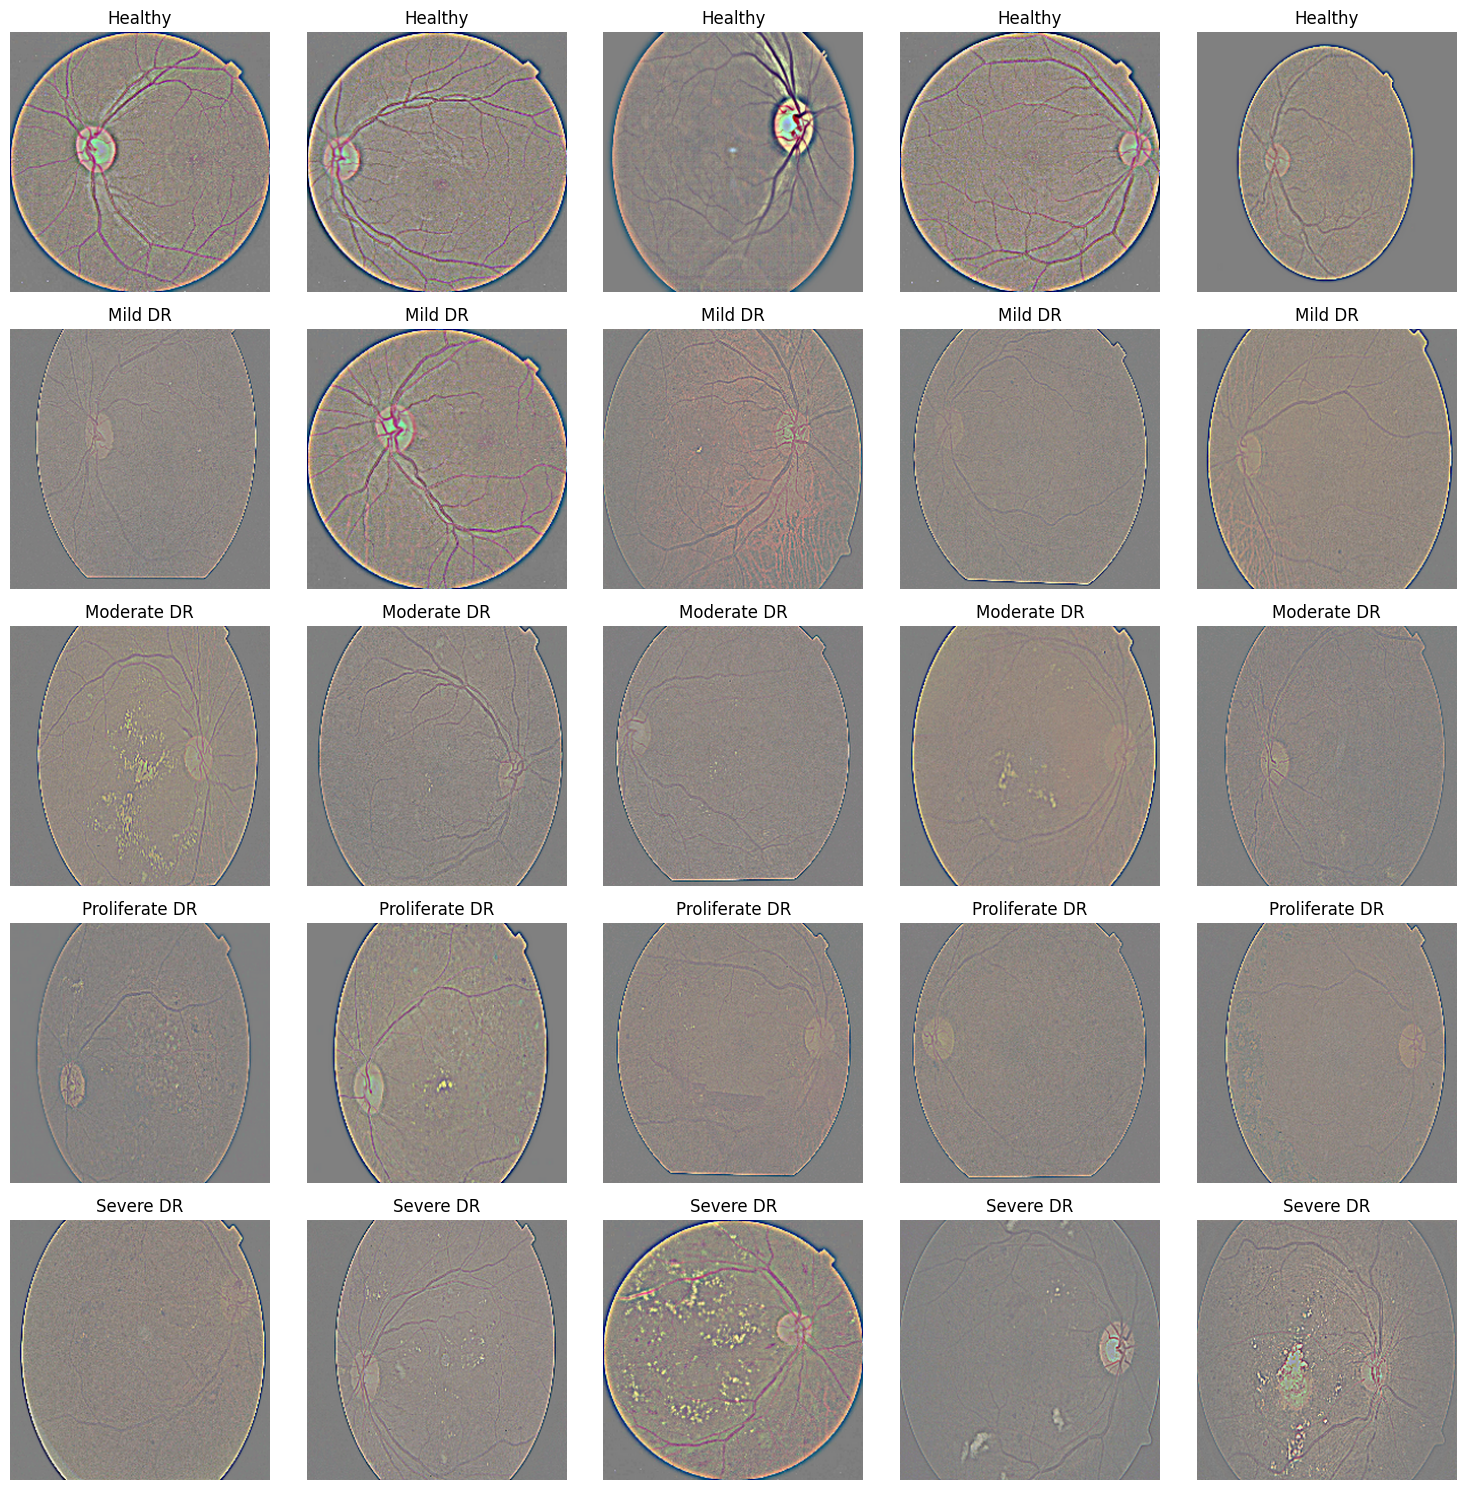

In [ ]:
# show 5 sample images from Essa's dataset for each class label
import os
from PIL import Image
import random
import matplotlib.pyplot as plt

path = "/content/diabeticData"

i = 1
plt.figure(figsize=(15, 15))

for cls in classes1:
  folder = os.path.join(path, cls)
  imgs = os.listdir(folder)
  sample_imgs = random.sample(imgs, 5)

  for img_name in sample_imgs:
    img_path = os.path.join(folder, img_name)
    img = Image.open(img_path)

    plt.subplot(len(classes1), 5, i)
    plt.imshow(img)
    plt.title(cls)
    plt.axis("off")
    i += 1

plt.tight_layout()
plt.show()

In [ ]:
# show dimensions of an images in essa's dataset
img = Image.open("/content/diabeticData/Healthy/Healthy.png")
print(img.size) # image size
print(img.mode) # channel dimension

(256, 256)
RGB


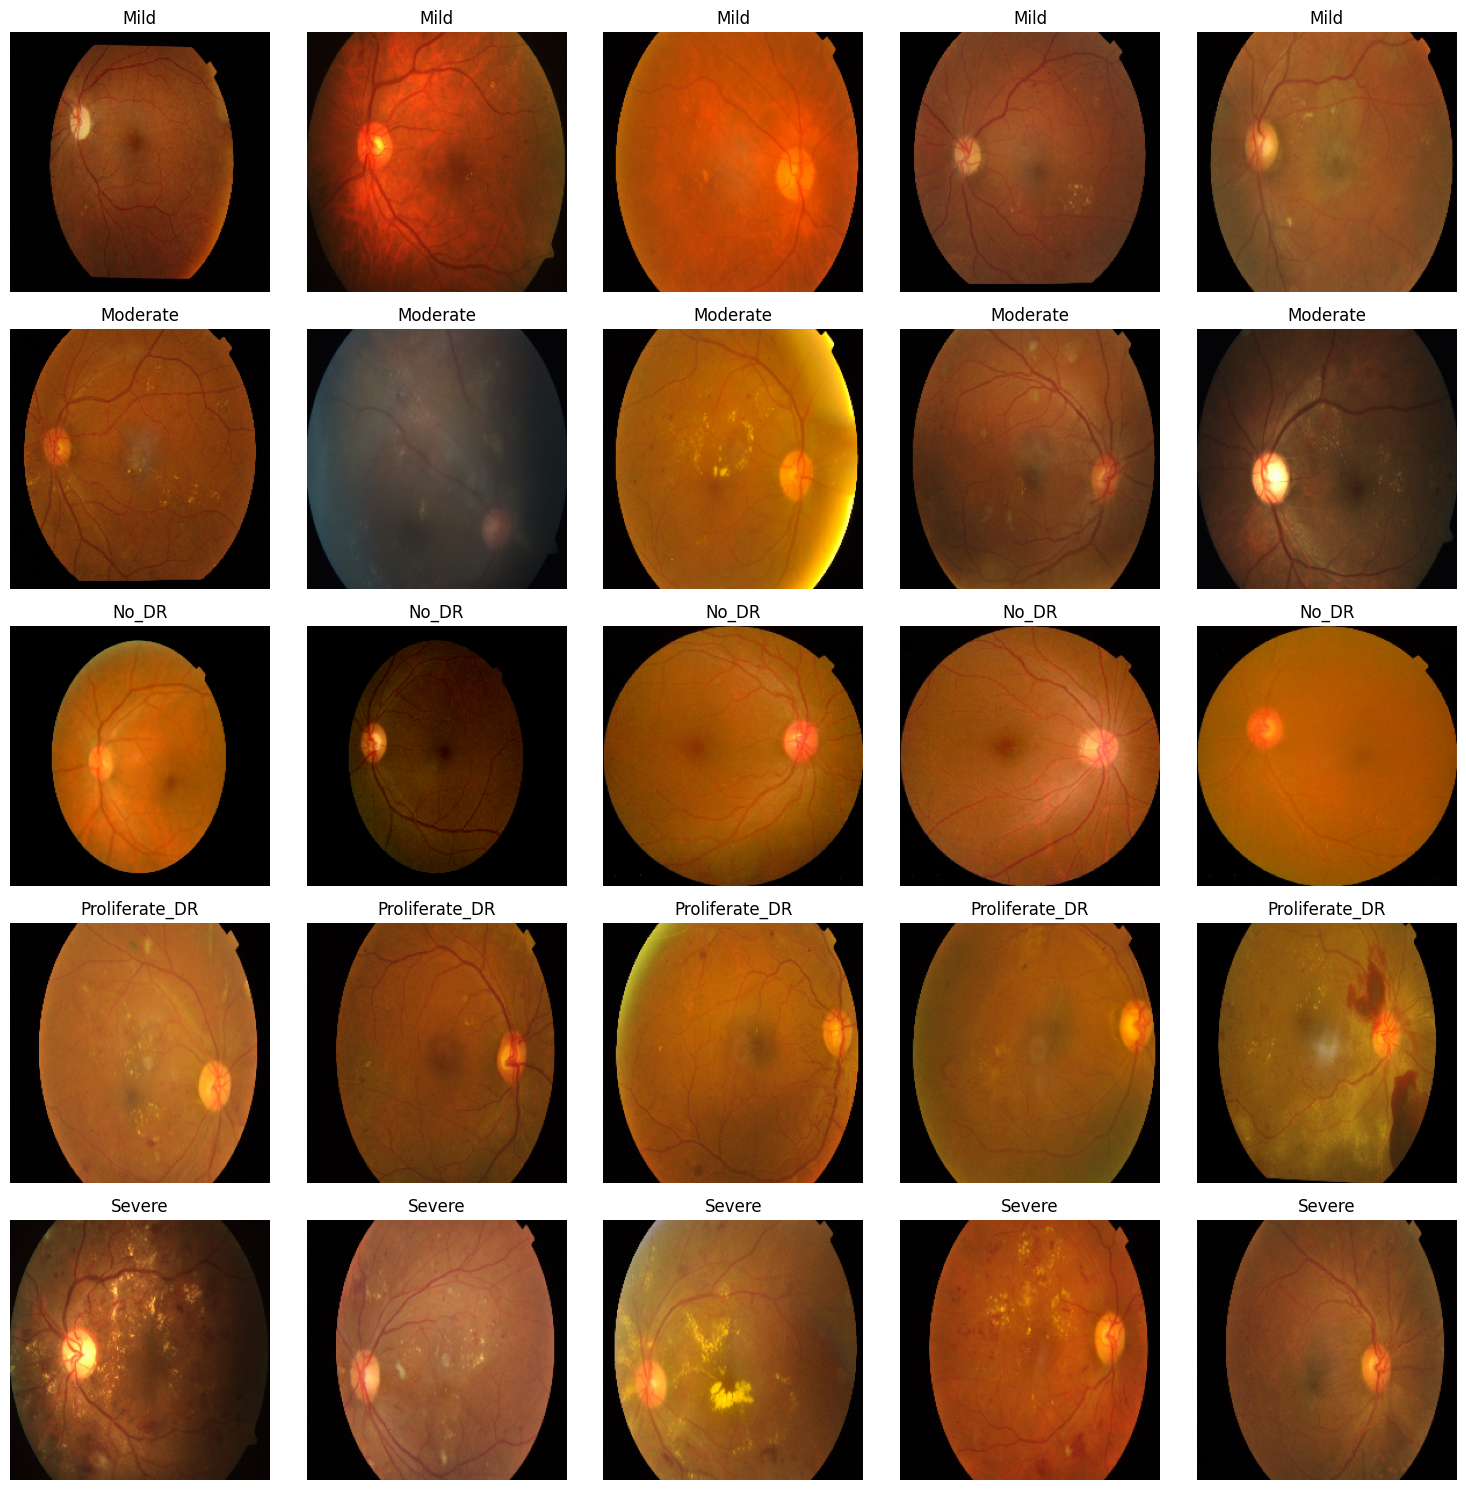

In [ ]:
# show 5 sample images from Rath's dataset for each class label
import os
from PIL import Image
import random
import matplotlib.pyplot as plt

path = "/content/diabeticData2/colored_images"

i = 1
plt.figure(figsize=(15, 15))

for cls in classes2:
  folder = os.path.join(path, cls)
  imgs = os.listdir(folder)
  sample_imgs = random.sample(imgs, 5)

  for img_name in sample_imgs:
    img_path = os.path.join(folder, img_name)
    img = Image.open(img_path)

    plt.subplot(len(classes2), 5, i)
    plt.imshow(img)
    plt.title(cls)
    plt.axis("off")
    i += 1

plt.tight_layout()
plt.show()

In [ ]:
# show dimensions of an images in Rath's dataset
img = Image.open("/content/diabeticData2/colored_images/Mild/0024cdab0c1e.png")
print(img.size) # image size
print(img.mode) # channel dimension

(224, 224)
RGB


In [ ]:
combined_root = "/content/combined_DR"

classes = ["0_Healthy", "1_Mild", "2_Moderate", "3_Severe","4_Proliferate_DR"]

for cls in classes:
    os.makedirs(os.path.join(combined_root, cls), exist_ok=True)

In [ ]:
folder_map = {
    "Healthy": "0_Healthy",
    "No_DR": "0_Healthy",
    "Mild DR": "1_Mild",
    "Mild": "1_Mild",
    "Moderate DR": "2_Moderate",
    "Moderate": "2_Moderate",
    "Severe": "3_Severe",
    "Severe DR": "3_Severe",
    "Proliferate_DR": "4_Proliferate_DR",
    "Proliferate DR": "4_Proliferate_DR",
}

In [ ]:
import shutil

# function that takes a dataset and adds it to a folder which will store the combined dataset
def add_dataset_to_combined(src_root, combined_root="/content/combined_DR"):
    for folder in os.listdir(src_root):
        src = os.path.join(src_root, folder)

        if not os.path.isdir(src):
            continue

        if folder not in folder_map:
            print(f"Skipping unknown folder: {folder}")
            continue

        target_class = folder_map[folder]
        target_dir = os.path.join(combined_root, target_class)

        for img in os.listdir(src):
            if img.lower().endswith((".jpg", ".jpeg", ".png")):
                shutil.copy(os.path.join(src, img), os.path.join(target_dir, img))

        print(f"Copied from {folder} → {target_class}")

In [ ]:
add_dataset_to_combined("/content/diabeticData")
add_dataset_to_combined("/content/diabeticData2/colored_images")

Copied from Moderate DR → 2_Moderate
Copied from Mild DR → 1_Mild
Copied from Severe DR → 3_Severe
Copied from Healthy → 0_Healthy
Copied from Proliferate DR → 4_Proliferate_DR
Copied from No_DR → 0_Healthy
Copied from Mild → 1_Mild
Copied from Proliferate_DR → 4_Proliferate_DR
Copied from Moderate → 2_Moderate
Copied from Severe → 3_Severe


In [ ]:
classCount = []

path = "/content/combined_DR"

for cls in classes: # print contents of combined dataset
    folder = os.path.join(path, cls)
    count = len([f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))])
    classCount.append(count)
    print(f"{cls}: {count} images")

0_Healthy: 2330 images
1_Mild: 740 images
2_Moderate: 1598 images
3_Severe: 395 images
4_Proliferate_DR: 585 images


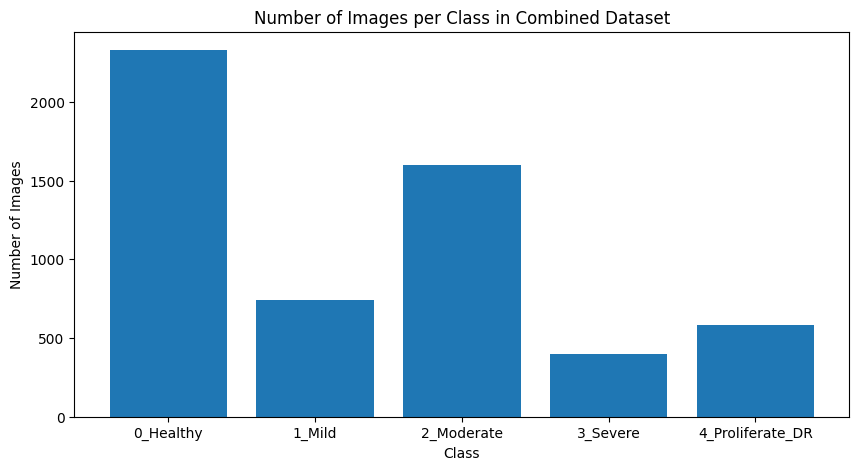

In [ ]:
# plot images --> see how unbalanced classes are
plt.figure(figsize=(10, 5))
plt.bar(classes, classCount)
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Number of Images per Class in Combined Dataset")
plt.show()

In [ ]:
# Create train and val folders
path = "/content"
classes = ["0_Healthy", "1_Mild", "2_Moderate", "3_Severe", "4_Proliferate_DR"]

for split in ["train", "val", "test"]:
    split_dir = os.path.join(path, split)  # /content/train or /content/val
    os.makedirs(split_dir, exist_ok=True)      # create train/ or val/

    # Create class subfolders inside each split
    for cls in classes:
        cls_dir = os.path.join(split_dir, cls)  # e.g., /content/train/Healthy
        os.makedirs(cls_dir, exist_ok=True)

In [ ]:
import shutil

path = "/content"
train_ratio = 0.75
val_ratio = 0.15

base_path = "/content"
combined_path = "/content/combined_DR"

# For each class, shuffle and split images
for cls in classes:
    src_dir = os.path.join(combined_path, cls)
    images = [f for f in os.listdir(src_dir) if f.lower().endswith((".jpg", ".jpeg", ".png"))]
    random.shuffle(images)

    total = len(images)
    train_end = int(total * train_ratio)
    val_end = train_end + int(total * val_ratio)

    train_images = images[:train_end]
    val_images = images[train_end:val_end]
    test_images = images[val_end:]

    # Move images to respective folders
    for img in train_images:
        shutil.move(os.path.join(src_dir, img), os.path.join(base_path, "train", cls, img))
    for img in val_images:
        shutil.move(os.path.join(src_dir, img), os.path.join(base_path, "val", cls, img))
    for img in test_images:
        shutil.move(os.path.join(src_dir, img), os.path.join(base_path, "test", cls, img))

print("Images successfully split into train/val/test folders!")

Images successfully split into train/val/test folders!


In [ ]:
import os

base_path = "/content"
classes = ["0_Healthy", "1_Mild", "2_Moderate", "3_Severe", "4_Proliferate_DR"]

train_counts = []
val_counts = []
test_counts = []

# split data into train, val, test using stratified sampling so that the class distribution is the same
for split in ["train", "val", "test"]:
    print(f"\n{split} folder contents:")
    for cls in classes:
        class_path = os.path.join(base_path, split, cls)
        if os.path.exists(class_path):
            num_images = len([f for f in os.listdir(class_path) if f.lower().endswith((".png", ".jpg", ".jpeg"))])

            if split == "train":
                train_counts.append(num_images)
            elif split == "val":
                val_counts.append(num_images)
            else:
                test_counts.append(num_images)

            print(f"{cls}: {num_images} images")
        else:
            print(f"{cls}: Folder not found!")



train folder contents:
0_Healthy: 1747 images
1_Mild: 555 images
2_Moderate: 1198 images
3_Severe: 296 images
4_Proliferate_DR: 438 images

val folder contents:
0_Healthy: 349 images
1_Mild: 111 images
2_Moderate: 239 images
3_Severe: 59 images
4_Proliferate_DR: 87 images

test folder contents:
0_Healthy: 234 images
1_Mild: 74 images
2_Moderate: 161 images
3_Severe: 40 images
4_Proliferate_DR: 60 images


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

train_transform = transforms.Compose([
    transforms.Resize((224, 224)), # resize all to 224x224
    transforms.RandomHorizontalFlip(), # apply augmentations to training images to reduce overfitting and promote generalization
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]) # center and scale each pixel from -1 to 1
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # utilize GPU

In [ ]:
train_ds = datasets.ImageFolder("train", transform=train_transform)
test_ds = datasets.ImageFolder("test", transform=test_transform)
val_ds = datasets.ImageFolder("val", transform=test_transform)

train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=16, shuffle=False)
val_loader = DataLoader(val_ds, batch_size=16, shuffle=False) # transform images to prevent overfitting

num_classes = len(train_ds.classes)

print(train_ds.class_to_idx)
print(val_ds.class_to_idx)
print(test_ds.class_to_idx)

{'0_Healthy': 0, '1_Mild': 1, '2_Moderate': 2, '3_Severe': 3, '4_Proliferate_DR': 4}
{'0_Healthy': 0, '1_Mild': 1, '2_Moderate': 2, '3_Severe': 3, '4_Proliferate_DR': 4}
{'0_Healthy': 0, '1_Mild': 1, '2_Moderate': 2, '3_Severe': 3, '4_Proliferate_DR': 4}


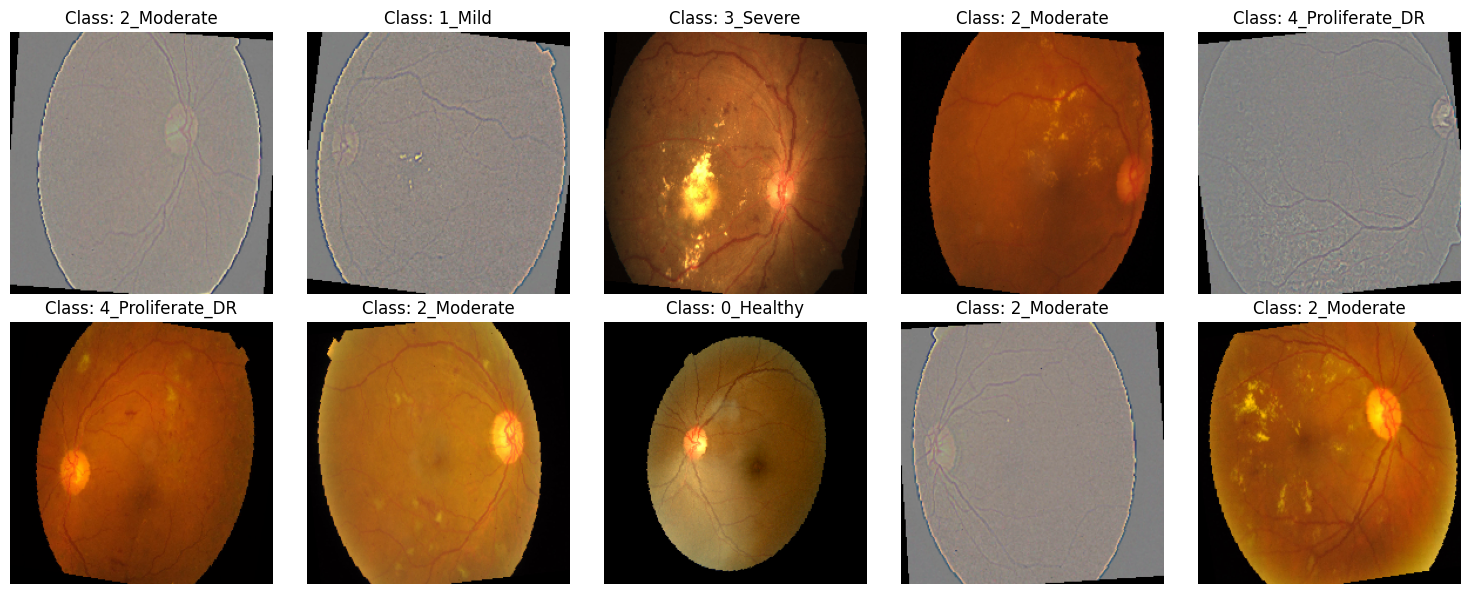

In [ ]:
# Get 10 random indices
indices = random.sample(range(len(train_ds)), 10)

plt.figure(figsize=(15, 6))

for i, idx in enumerate(indices):
    img, label = train_ds[idx]  # transform is applied here

    # Convert from tensor (C,H,W) → numpy array (H,W,C)
    img_np = img.permute(1, 2, 0).numpy()

    # Undo normalization (since you used mean=0.5, std=0.5)
    img_np = img_np * 0.5 + 0.5

    plt.subplot(2, 5, i + 1)
    plt.imshow(img_np)
    plt.title(f"Class: {train_ds.classes[label]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
counts = np.array(train_counts)
labels = np.concatenate([[i]*c for i, c in enumerate(counts)])
class_weights_np = compute_class_weight("balanced", classes=np.unique(labels), y=labels)
class_weights = torch.tensor(class_weights_np, dtype=torch.float32) # weigh classses porportionally to how often they appear in dataset
print(class_weights)                                                # ex: total samples / number of severe * 5 (class labels)
class_weights = class_weights.to(device)

tensor([0.4847, 1.5258, 0.7068, 2.8608, 1.9333])


In [ ]:
class DR_CNN_Complex(nn.Module):
    def __init__(self):
        super(DR_CNN_Complex, self).__init__()

        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),  # 112x112

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),  # 56x56

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),  # 28x28

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2),  # 14x14

            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(2)   # 7x7
        )

        # Global Average Pooling
        self.gap = nn.AdaptiveAvgPool2d(1)  # 512x1x1 → 512

        # Classifier
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.2), # smaller dropout since model is shallow
            nn.Linear(256, 5)  # 5 classes
        )

    def forward(self, x):
        x = self.features(x)
        x = self.gap(x)
        x = self.classifier(x)
        return x

    def extract_features(self, x):
        x = self.features(x)
        x = self.gap(x)
        return x.view(x.size(0), -1)  # (batch, 512)

model = DR_CNN_Complex().to(device)

In [ ]:
import torch.nn as nn

def reset_weights(m): # resets weights of CNN layers
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
        m.reset_parameters()

In [ ]:
criterion = nn.CrossEntropyLoss(weight = class_weights)

In [ ]:
def evaluate(model, loader): # test evaluation function
    model.eval()
    running_loss = 0
    correct_top1, correct_top2, correct_top3, total = 0, 0, 0, 0

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * images.size(0)

            # Top-1
            _, preds = torch.max(outputs, 1)
            correct_top1 += (preds == labels).sum().item()

            # Top-2
            top2 = outputs.topk(2, dim=1).indices
            correct_top2 += (top2 == labels.unsqueeze(1)).any(dim=1).sum().item()

            # top-3 accuracy
            top3 = outputs.topk(3, dim=1).indices
            correct_top3 += (top3 == labels.unsqueeze(1)).any(dim=1).sum().item()

            total += labels.size(0)

    return running_loss/total, correct_top1/total, correct_top2/total, correct_top3/total

In [ ]:
from sklearn.metrics import f1_score
import copy
import torch

# training loop and evaluate the model on the validation set
def train(model, train_loader, val_loader, optimizer, criterion,
                              epochs=50, patience=5, device='cuda'):
    train_losses = []
    val_losses = []
    best_model_wts = copy.deepcopy(model.state_dict()) # save best performing models weights when evaluating later
    epochs_no_improve = 0
    best_score = 0.0
    best_score_val_acc1 = 0
    best_score_f1 = 0

    for epoch in range(epochs):
        # Training Steps
        model.train()
        running_loss = 0
        correct_top1, total = 0, 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0) # track loss
            _, preds = torch.max(outputs, 1)
            correct_top1 += (preds == labels).sum().item()
            total += labels.size(0)

        train_loss = running_loss / total
        train_acc1 = correct_top1 / total
        train_losses.append(train_loss)

        # Validation steps
        model.eval()
        running_loss = 0
        correct_top1, total = 0, 0
        all_preds = []
        all_labels = []

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)

                running_loss += loss.item() * images.size(0)
                _, preds = torch.max(outputs, 1)
                correct_top1 += (preds == labels).sum().item()
                total += labels.size(0)

                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        val_f1 = f1_score(all_labels, all_preds, average='macro') # calculate macro average of each labels f1_score
        val_loss = running_loss / total                           # ensures less samples labels (like severe or proliferate)
        val_acc1 = correct_top1 / total                           # count as much as majority labels
        val_losses.append(val_loss)

        score = 0.7 * val_f1 + 0.3 * val_acc1 # weigh f1 score in calculating model performance more than accuracy

        print(f"Epoch {epoch+1}/{epochs} | "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc1:.4f} | "
              f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc1:.4f}, Val F1: {val_f1:.4f}, Score: {score:.4f}")

        # early stoppping implimentation
        if score > best_score:
            best_score = score
            best_model_wts = copy.deepcopy(model.state_dict())
            epochs_no_improve = 0
            best_score_val_acc1 = val_acc1
            best_score_f1 = val_f1
        else:
            epochs_no_improve += 1

        if epochs_no_improve >= patience:
            print(f"Early stopping triggered after {epoch+1} epochs!\n")
            break

    # Load best weights
    model.load_state_dict(best_model_wts)
    return model, train_losses, val_losses, best_score_val_acc1, best_score_f1, best_score

In [ ]:
import matplotlib.pyplot as plt
import copy
import torch
from torch.utils.data import DataLoader

# Assume train_ds, val_ds, model, criterion, reset_weights, device are defined

batch_sizes = [16, 32] # do 32, 64
learning_rates = [1e-3, 1e-4] # do 1e-3, 1e-2 as well

results = []

for bs in batch_sizes:
    for lr in learning_rates:
        print(f"\nRunning experiment: batch_size={bs}, lr={lr}\n")

        # Reset model weights
        model.apply(reset_weights)

        # DataLoaders
        train_loader = DataLoader(train_ds, batch_size=bs, shuffle=True)
        val_loader   = DataLoader(val_ds, batch_size=bs, shuffle=False)

        # Optimizer
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)

        # Train model with early stopping
        model, train_losses, val_losses, best_val_acc1, best_f1, best_score = train(
            model, train_loader, val_loader, optimizer, criterion,
            epochs=100, patience=15, device=device
        )

        # Save best model
        torch.save(model.state_dict(), f"dr_cnn_bs{bs}_lr{lr}.pth")

        # Save results
        results.append({
            'batch_size': bs,
            'learning_rate': lr,
            'best_val_acc': best_val_acc1,
            'train_losses': train_losses,
            'val_losses': val_losses,
            'best_f1': best_f1,
            'best_score': best_score
        })



Running experiment: batch_size=16, lr=0.001

Epoch 1/100 | Train Loss: 1.4467, Train Acc: 0.4386 | Val Loss: 1.2626, Val Acc: 0.4095, Val F1: 0.2540, Score: 0.3006
Epoch 2/100 | Train Loss: 1.3488, Train Acc: 0.5283 | Val Loss: 1.0417, Val Acc: 0.5882, Val F1: 0.3489, Score: 0.4207
Epoch 3/100 | Train Loss: 1.3105, Train Acc: 0.5619 | Val Loss: 1.0231, Val Acc: 0.5905, Val F1: 0.3756, Score: 0.4401
Epoch 4/100 | Train Loss: 1.3042, Train Acc: 0.5673 | Val Loss: 1.0950, Val Acc: 0.5645, Val F1: 0.3436, Score: 0.4099
Epoch 5/100 | Train Loss: 1.2992, Train Acc: 0.5612 | Val Loss: 1.0354, Val Acc: 0.5893, Val F1: 0.4009, Score: 0.4574
Epoch 6/100 | Train Loss: 1.2836, Train Acc: 0.5690 | Val Loss: 1.0129, Val Acc: 0.6024, Val F1: 0.4083, Score: 0.4665
Epoch 7/100 | Train Loss: 1.2703, Train Acc: 0.5763 | Val Loss: 0.9946, Val Acc: 0.6154, Val F1: 0.4633, Score: 0.5089
Epoch 8/100 | Train Loss: 1.2606, Train Acc: 0.5850 | Val Loss: 0.9928, Val Acc: 0.6024, Val F1: 0.4389, Score: 0.4879
Ep

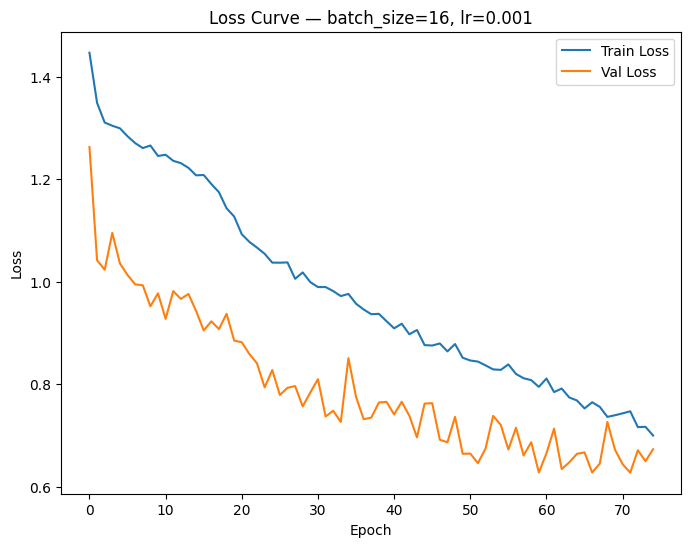

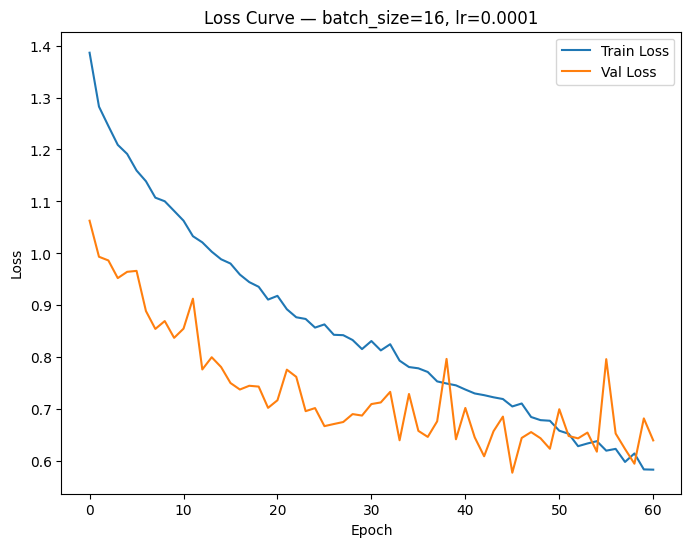

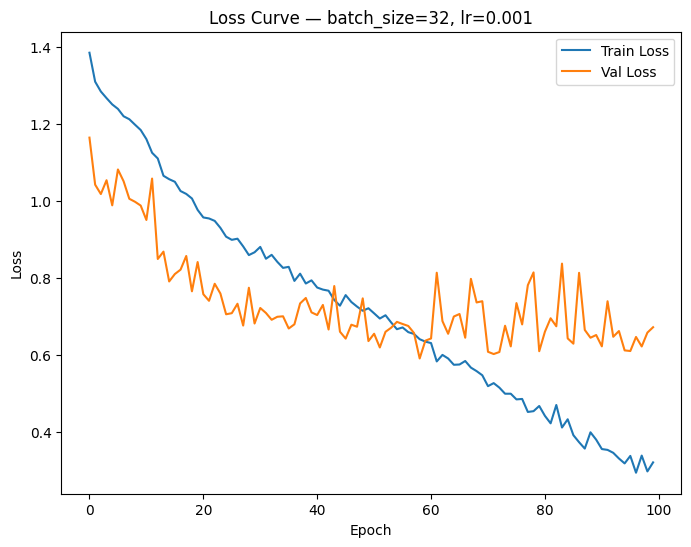

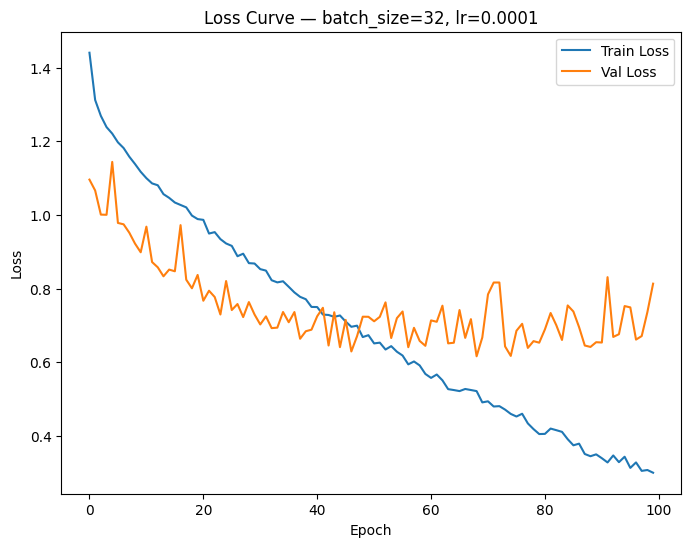

In [ ]:
for r in results:
    bs = r['batch_size']
    lr = r['learning_rate']

    plt.figure(figsize=(8,6))
    plt.plot(r['train_losses'], label="Train Loss")
    plt.plot(r['val_losses'], label="Val Loss")

    plt.title(f"Loss Curve — batch_size={bs}, lr={lr}")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

In [ ]:
import pandas as pd

acc_table = pd.DataFrame(index=batch_sizes, columns=learning_rates)
score_table = pd.DataFrame(index=batch_sizes, columns=learning_rates)
f1_table = pd.DataFrame(index=batch_sizes, columns=learning_rates)
for r in results:
    acc_table.loc[r['batch_size'], r['learning_rate']] = r['best_val_acc']
    score_table.loc[r['batch_size'], r['learning_rate']] = r['best_score']
    f1_table.loc[r['batch_size'], r['learning_rate']] = r['best_f1']

print("Best validation accuracies (Top-1) for each batch size × learning rate:")
print(acc_table)
print("\n")
print("Best f1 scores for each batch size × learning rate:")
print(f1_table)
print("\n")
print("Best scores (weighted f1/accuracy)for each batch size × learning rate:")
print(score_table)
print("\n")

Best validation accuracies (Top-1) for each batch size × learning rate:
      0.0010    0.0001
16  0.750296  0.775148
32  0.807101  0.785799


Best f1 scores for each batch size × learning rate:
      0.0010    0.0001
16  0.651473  0.673494
32  0.726232  0.698487


Best scores (weighted f1/accuracy)for each batch size × learning rate:
      0.0010   0.0001
16   0.68112  0.70399
32  0.750493  0.72468




In [ ]:
# Find the best experiment
best_result = max(results, key=lambda x: x['best_score'])
best_bs = best_result['batch_size']
best_lr = best_result['learning_rate']

print(f"Best combination: batch_size={best_bs}, learning_rate={best_lr}, best_score={best_result['best_score']:.4f}")

# Load the corresponding model weights
best_model_path = f"dr_cnn_bs{best_bs}_lr{best_lr}.pth"
model.apply(reset_weights)  # optional: reset before loading
model.load_state_dict(torch.load(best_model_path))
model.to(device)
model.eval()

# Evaluate on test set
test_loss, test_acc1, test_acc2, test_acc3 = evaluate(model, test_loader)
print(f"Test Loss: {test_loss:.4f} | Top-1: {test_acc1:.4f} | Top-2: {test_acc2:.4f} | Top-3: {test_acc3:.4f}")

Best combination: batch_size=32, learning_rate=0.001, best_score=0.7505
Test Loss: 0.5894 | Top-1: 0.8102 | Top-2: 0.9525 | Top-3: 0.9912


<Figure size 800x600 with 0 Axes>

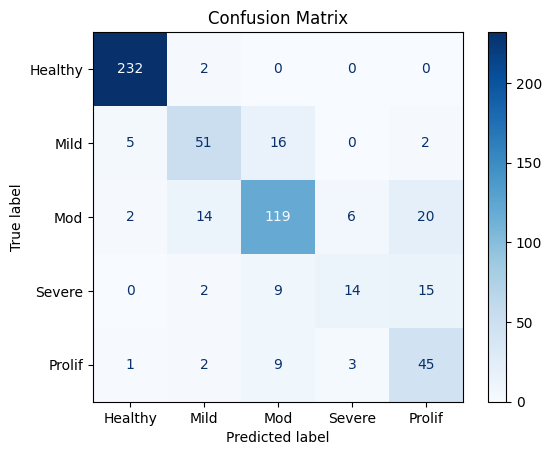

Classification Report:

              precision    recall  f1-score   support

     Healthy       0.97      0.99      0.98       234
        Mild       0.72      0.69      0.70        74
         Mod       0.78      0.74      0.76       161
      Severe       0.61      0.35      0.44        40
      Prolif       0.55      0.75      0.63        60

    accuracy                           0.81       569
   macro avg       0.72      0.70      0.70       569
weighted avg       0.81      0.81      0.81       569



In [ ]:
import torch
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Make sure the model is in eval mode
model.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(cm, display_labels=["Healthy","Mild","Mod","Severe","Prolif",])

# Plot confusion matrix
plt.figure(figsize=(8,6))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()

# Compute precision, recall, F1-score per class
report = classification_report(
    all_labels,
    all_preds,
    target_names=["Healthy","Mild","Mod","Severe", "Prolif"]
)

print("Classification Report:\n")
print(report)


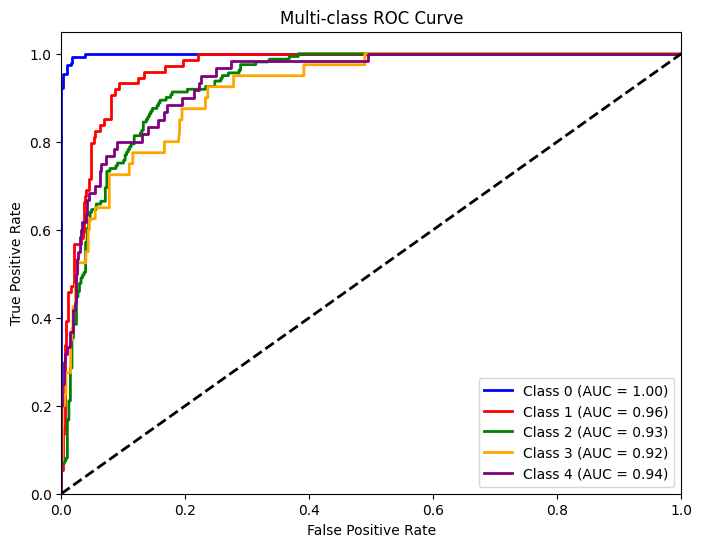

In [ ]:
import torch.nn as nn
from torch.utils.data import DataLoader
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

model.eval()
all_probs = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        logits = model(images)            # shape: (B, 5)
        probs = torch.softmax(logits, dim=1)  # convert logits to probabilities
        all_probs.append(probs.cpu().numpy())
        all_labels.append(labels.cpu().numpy())

y_probs = np.concatenate(all_probs, axis=0)  # (N, 5)
y_true = np.concatenate(all_labels, axis=0)  # (N,)

# binarize labels for multi-class ROC
n_classes = y_probs.shape[1]
y_true_bin = label_binarize(y_true, classes=np.arange(n_classes))

# compute ROC-AUC per class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8,6))
colors = ['blue', 'red', 'green', 'orange', 'purple']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# details of plot
plt.plot([0,1],[0,1],'k--', lw=2)
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-class ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# load best model
model.load_state_dict(torch.load(best_model_path))
model.eval()

DR_CNN_Complex(
  (features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=

In [ ]:
import numpy as np

# function to pass image into and then get feature vectors based on CNN
def extract_embeddings(model, loader):
    model.eval()
    all_features = []
    all_labels = []

    with torch.no_grad():
        for images, labels in loader:
            images = images.to(device)
            feats = model.features(images)   # pass through CNN backbone
            feats = model.gap(feats)         # global average pooling
            feats = feats.view(feats.size(0), -1)  # flatten
            all_features.append(feats.cpu().numpy())
            all_labels.append(labels.numpy())

    X = np.concatenate(all_features, axis=0)
    y = np.concatenate(all_labels, axis=0)
    return X, y

In [ ]:
# Extract features for the whole dataset by running through CNN
X_train, y_train = extract_embeddings(model, train_loader)
X_test, y_test = extract_embeddings(model, test_loader)
X_val, y_val = extract_embeddings(model, val_loader)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score

# grid of different random forest parameters we want to test
param_grid = {
    "n_estimators": [200, 400],
    "max_depth": [None, 20, 40],
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

best_score = -1
best_params = None
best_model_rf = None

# testing loop
for n in param_grid["n_estimators"]:
    for d in param_grid["max_depth"]:
        for mf in param_grid["max_features"]:
            for mss in param_grid["min_samples_split"]:
                for msl in param_grid["min_samples_leaf"]:

                    rf = RandomForestClassifier(
                        n_estimators=n,
                        max_depth=d,
                        max_features=mf,
                        min_samples_split=mss,
                        min_samples_leaf=msl,
                        class_weight="balanced",
                        n_jobs=-1
                    )

                    rf.fit(X_train, y_train)
                    val_preds = rf.predict(X_val)

                    # Compute F1-macro and validation accuracy
                    f1 = f1_score(y_val, val_preds, average="macro")
                    acc = accuracy_score(y_val, val_preds)

                    combined_score = 0.3 * acc + 0.7 * f1

                    # find best combination of parameters
                    if combined_score > best_score:
                        best_score = combined_score
                        best_params = (n, d, mf, mss, msl)
                        best_model_rf = rf
                        print("New best:", best_score, best_params)

print("\nBEST RF Combined Score:", best_score)
print("BEST PARAMS:", best_params)

New best: 0.7146661016243292 (200, None, 'sqrt', 2, 1)
New best: 0.7264723547955279 (200, None, 'log2', 2, 2)
New best: 0.7314572885780651 (200, None, 'log2', 5, 2)
New best: 0.7333698321142824 (400, None, 'log2', 5, 2)
New best: 0.7338552154022113 (400, 40, 'sqrt', 2, 2)

BEST RF Combined Score: 0.7338552154022113
BEST PARAMS: (400, 40, 'sqrt', 2, 2)


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       234
           1       0.85      0.62      0.72        74
           2       0.70      0.87      0.78       161
           3       0.60      0.30      0.40        40
           4       0.64      0.60      0.62        60

    accuracy                           0.82       569
   macro avg       0.75      0.68      0.70       569
weighted avg       0.82      0.82      0.81       569



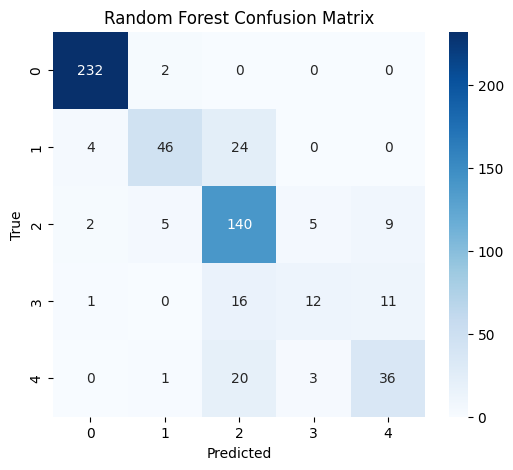

Top-1 Accuracy: 0.8190
Top-2 Accuracy: 0.9508
Top-3 Accuracy: 0.9912


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

rf = best_model_rf # load best parameters

preds = rf.predict(X_test)
probs = rf.predict_proba(X_test)
print(classification_report(y_test, preds))

# Top-1 accuracy
top1_preds = np.argmax(probs, axis=1)
top1_acc = np.mean(top1_preds == y_test)

# Top-2 accuracy
top2_preds = np.argsort(probs, axis=1)[:, -2:]  # take 2 highest probability classes
top2_correct = [y_test[i] in top2_preds[i] for i in range(len(y_test))]
top2_acc = np.mean(top2_correct)

top3_preds = np.argsort(probs, axis=1)[:, -3:]  # take 3 highest probability classes
top3_correct = [y_test[i] in top3_preds[i] for i in range(len(y_test))]
top3_acc = np.mean(top3_correct)

# Confusion matrix
cm = confusion_matrix(y_test, preds)

# generate heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random Forest Confusion Matrix")
plt.show()

print(f"Top-1 Accuracy: {top1_acc:.4f}")
print(f"Top-2 Accuracy: {top2_acc:.4f}")
print(f"Top-3 Accuracy: {top3_acc:.4f}")

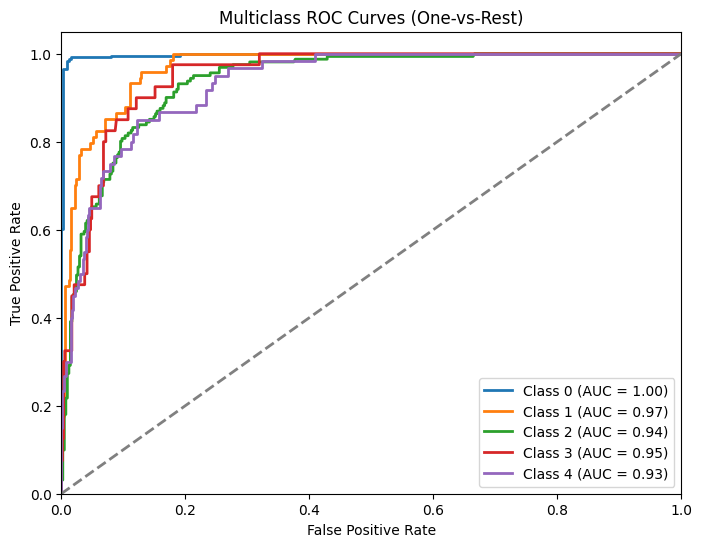

In [ ]:
# One-hot encode true labels
y_test_onehot = label_binarize(y_test, classes=[0,1,2,3,4])

# probs from rf.predict_proba(X_test)
n_classes = y_test_onehot.shape[1]

plt.figure(figsize=(8,6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_onehot[:, i], probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Diagonal line for random classifier
plt.plot([0,1], [0,1], color='gray', linestyle='--', lw=2)

# Plot roc-auc
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curves (One-vs-Rest)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
import numpy as np

# distance penalty weights
penalties = np.array([1, 4, 9, 16, 25])  # for distance 0–4

def ordinal_penalty_objective(preds, dtrain):
    """
    vectorized ordinal-aware loss for XGBoost.
    Penalizes predictions further from the true label.
    Returns grad and hess with shape (N, C)
    """
    y = dtrain.get_label().astype(int)      # shape: (N,)
    num_class = 5
    preds = preds.reshape(-1, num_class)    # shape: (N, C)

    # softmax probabilities
    exp_preds = np.exp(preds - np.max(preds, axis=1, keepdims=True))
    prob = exp_preds / np.sum(exp_preds, axis=1, keepdims=True)  # (N, C)

    # compute distance from true labels
    class_idx = np.arange(num_class)
    dist = np.abs(class_idx - y[:, None])  # shape: (N, C)
    penalty = penalties[dist]               # shape: (N, C)

    # gradient: (prob * penalty) - target_penalty
    grad = prob * penalty
    grad[np.arange(len(y)), y] -= penalty[np.arange(len(y)), y]

    # hessian (diagonal approx)
    hess = prob * (1 - prob) * penalty

    return grad, hess

In [ ]:
import xgboost as xgb
from sklearn.metrics import f1_score, accuracy_score

# create Dmatrices
dtrain = xgb.DMatrix(X_train, label=y_train)
dval   = xgb.DMatrix(X_val, label=y_val)
dtest  = xgb.DMatrix(X_test, label=y_test)

# Search space for parameters
param_grid = {
    "eta": [0.05, 0.1, 0.01],
    "max_depth": [3, 5],
    "subsample": [0.7, 0.9],
    "colsample_bytree": [0.7, 0.9],
}

best_score = -1
best_model_xgb = None
best_params = None

# loop for tuning hyperparameters
for lr in param_grid["eta"]:
    for depth in param_grid["max_depth"]:
        for ss in param_grid["subsample"]:
            for cs in param_grid["colsample_bytree"]:

                params = {
                    "objective": "multi:softprob",
                    "num_class": 5,
                    "eta": lr,
                    "max_depth": depth,
                    "subsample": ss,
                    "colsample_bytree": cs,
                    "eval_metric": "mlogloss",
                }

                # Train with early stopping on the VAL set
                model = xgb.train(
                    params,
                    dtrain,
                    num_boost_round=500,
                    evals=[(dval, "validation")],
                    early_stopping_rounds=20,
                    verbose_eval=False
                )

                # Evaluate on VAL
                val_probs = model.predict(dval)
                val_preds = val_probs.argmax(axis=1)

                # Compute F1-macro and accuracy
                f1 = f1_score(y_val, val_preds, average="macro")
                acc = accuracy_score(y_val, val_preds)

                # combined score
                combined_score = 0.3 * acc + 0.7 * f1

                if combined_score > best_score:
                    best_score = combined_score
                    best_params = params
                    best_model_xgb = model
                    print("New best combined score:", combined_score, "Params:", params)

print("\nBEST XGBOOST VAL COMBINED SCORE:", best_score)
print("BEST PARAMS:", best_params)

New best combined score: 0.7390178259555574 Params: {'objective': 'multi:softprob', 'num_class': 5, 'eta': 0.05, 'max_depth': 3, 'subsample': 0.7, 'colsample_bytree': 0.7, 'eval_metric': 'mlogloss'}
New best combined score: 0.7442750971864469 Params: {'objective': 'multi:softprob', 'num_class': 5, 'eta': 0.05, 'max_depth': 3, 'subsample': 0.7, 'colsample_bytree': 0.9, 'eval_metric': 'mlogloss'}
New best combined score: 0.749073516577919 Params: {'objective': 'multi:softprob', 'num_class': 5, 'eta': 0.1, 'max_depth': 3, 'subsample': 0.7, 'colsample_bytree': 0.7, 'eval_metric': 'mlogloss'}

BEST XGBOOST VAL COMBINED SCORE: 0.749073516577919
BEST PARAMS: {'objective': 'multi:softprob', 'num_class': 5, 'eta': 0.1, 'max_depth': 3, 'subsample': 0.7, 'colsample_bytree': 0.7, 'eval_metric': 'mlogloss'}


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       234
           1       0.74      0.69      0.71        74
           2       0.71      0.80      0.75       161
           3       0.62      0.33      0.43        40
           4       0.63      0.63      0.63        60

    accuracy                           0.81       569
   macro avg       0.73      0.69      0.70       569
weighted avg       0.81      0.81      0.80       569

Top-1 Accuracy: 0.8102
Top-2 Accuracy: 0.9473
Top-3 Accuracy: 0.9947


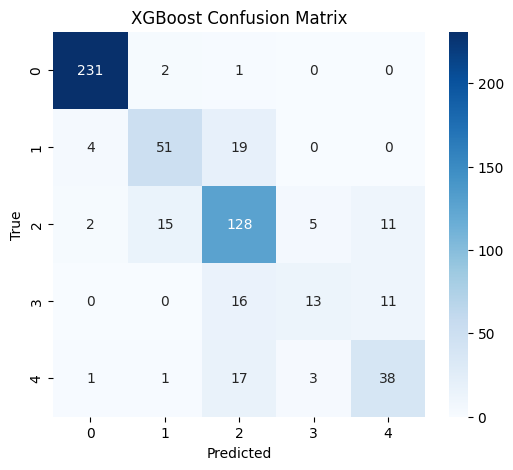

In [ ]:
# evaluate on Test data
probs = best_model_xgb.predict(dtest)
preds = probs.argmax(axis=1)

print(classification_report(y_test, preds))

# Top K accuracies
top1_acc = np.mean(preds == y_test)

top2_preds = np.argsort(probs, axis=1)[:, -2:]
top2_acc = np.mean([y_test[i] in top2_preds[i] for i in range(len(y_test))])

top3_preds = np.argsort(probs, axis=1)[:, -3:]
top3_acc = np.mean([y_test[i] in top3_preds[i] for i in range(len(y_test))])

print(f"Top-1 Accuracy: {top1_acc:.4f}")
print(f"Top-2 Accuracy: {top2_acc:.4f}")
print(f"Top-3 Accuracy: {top3_acc:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("XGBoost Confusion Matrix")
plt.show()

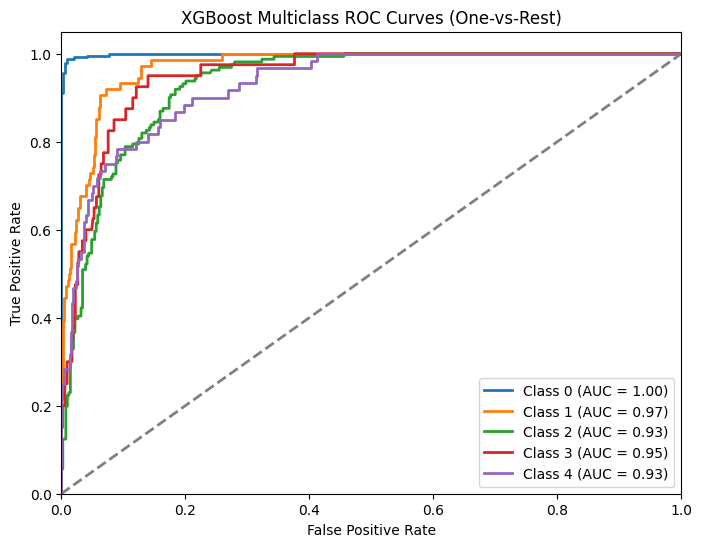

In [ ]:
# one hot encode labels
y_test_onehot = label_binarize(y_test, classes=[0,1,2,3,4])

n_classes = y_test_onehot.shape[1]
plt.figure(figsize=(8,6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_onehot[:, i], probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

# plot roc-auc
plt.plot([0,1], [0,1], color='gray', linestyle='--', lw=2)
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost Multiclass ROC Curves (One-vs-Rest)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
num_class = 5

# this model was trained with an ordinal-aware loss penalty that penalized the model more for making predictions further from the correct one
best_ordinal_score = -1
best_ordinal_params = None
best_ordinal_model = None

# loop for tuning hyperparamters
for lr in param_grid["eta"]:
    for depth in param_grid["max_depth"]:
        for ss in param_grid["subsample"]:
            for cs in param_grid["colsample_bytree"]:

                params = {
                    "num_class": num_class,
                    "eta": lr,
                    "max_depth": depth,
                    "subsample": ss,
                    "colsample_bytree": cs,
                    "objective": "multi:softprob",  # need to output 5 values to feed to ordinal loss
                    "eval_metric": "mlogloss"
                }

                model = xgb.train(
                    params,
                    dtrain,
                    num_boost_round=500,
                    evals=[(dval, "validation")],
                    early_stopping_rounds=20,
                    verbose_eval=False,
                    obj=ordinal_penalty_objective # ordinal loss adjusts penalty in training
                )

                val_probs = model.predict(dval)  # already (N, 5)
                val_preds = val_probs.argmax(axis=1)

                f1 = f1_score(y_val, val_preds, average="macro")
                acc = accuracy_score(y_val, val_preds)
                combined = 0.3 * acc + 0.7 * f1

                if combined > best_ordinal_score:
                    best_ordinal_score = combined
                    best_ordinal_params = params
                    best_ordinal_model = model
                    print("NEW ORDINAL BEST:", combined, params)

print("\nBEST ORDINAL SCORE:", best_ordinal_score)
print("BEST ORDINAL PARAMS:", best_ordinal_params)


NEW ORDINAL BEST: 0.7455779683783246 {'num_class': 5, 'eta': 0.05, 'max_depth': 3, 'subsample': 0.7, 'colsample_bytree': 0.7, 'objective': 'multi:softprob', 'eval_metric': 'mlogloss'}
NEW ORDINAL BEST: 0.752460517073368 {'num_class': 5, 'eta': 0.1, 'max_depth': 3, 'subsample': 0.7, 'colsample_bytree': 0.7, 'objective': 'multi:softprob', 'eval_metric': 'mlogloss'}

BEST ORDINAL SCORE: 0.752460517073368
BEST ORDINAL PARAMS: {'num_class': 5, 'eta': 0.1, 'max_depth': 3, 'subsample': 0.7, 'colsample_bytree': 0.7, 'objective': 'multi:softprob', 'eval_metric': 'mlogloss'}


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       234
           1       0.73      0.70      0.72        74
           2       0.72      0.84      0.77       161
           3       0.58      0.35      0.44        40
           4       0.65      0.55      0.59        60

    accuracy                           0.82       569
   macro avg       0.73      0.68      0.70       569
weighted avg       0.81      0.82      0.81       569



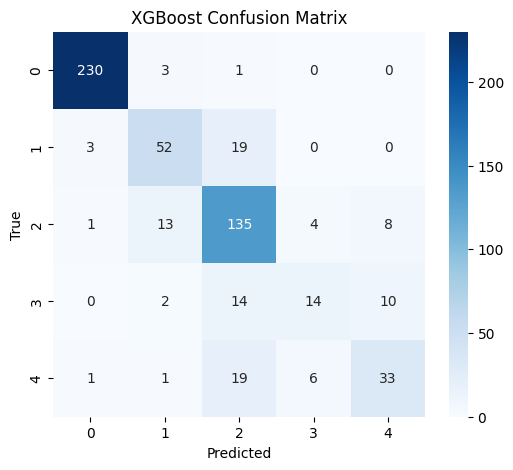

Top-1 Accuracy: 0.8155
Top-2 Accuracy: 0.9508
Top-3 Accuracy: 0.9895


In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# make predictions
probs =  best_ordinal_model.predict(dtest) # shape: (num_samples, 5)
preds = np.argmax(probs, axis=1)

# Classification report
print(classification_report(y_test, preds))

# Top-1 / Top-2 / Top-3 accuracy
top1_acc = np.mean(preds == y_test)

top2_preds = np.argsort(probs, axis=1)[:, -2:]
top2_correct = [y_test[i] in top2_preds[i] for i in range(len(y_test))]
top2_acc = np.mean(top2_correct)

top3_preds = np.argsort(probs, axis=1)[:, -3:]
top3_correct = [y_test[i] in top3_preds[i] for i in range(len(y_test))]
top3_acc = np.mean(top3_correct)

# confusion matrix
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("XGBoost Confusion Matrix")
plt.show()

# accuracies
print(f"Top-1 Accuracy: {top1_acc:.4f}")
print(f"Top-2 Accuracy: {top2_acc:.4f}")
print(f"Top-3 Accuracy: {top3_acc:.4f}")

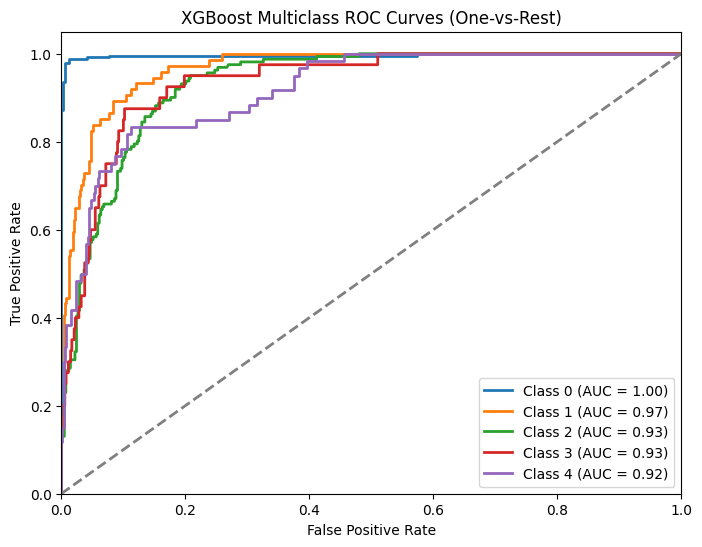

In [ ]:
# one hot encode label
y_test_onehot = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
n_classes = y_test_onehot.shape[1]

# Plot ROC curves
plt.figure(figsize=(8,6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_onehot[:, i], probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0,1], [0,1], color='gray', linestyle='--', lw=2)
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost Multiclass ROC Curves (One-vs-Rest)')
plt.legend(loc='lower right')
plt.show()